# Notebook to make figures for reviewer 2

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import re
import sys
from collections import OrderedDict
from pyhdf.SD import SD, SDC

In [8]:
libdir = '/home/tkurihana/Research/clouds/src_analysis/lib_hdfs'
sys.path.insert(1,os.path.join(sys.path[0],libdir))
from alignment_lib import *

In [21]:
import matplotlib.animation as animation

In [34]:
from PIL import Image

In [95]:
import tensorflow as tf

In [96]:
import math

### Get data

In [2]:
datadir = "/home/tkurihana/Research/data/MOD02/20151101-20160131"

In [3]:
filename = "MOD021KM.A*.EV_250_Aggr1km_RefSB_1.hdf"

In [4]:
filelist= glob.glob(os.path.join(datadir,filename))

In [5]:
len(filelist)

63

In [9]:
filelist[0]

'/home/tkurihana/Research/data/MOD02/20151101-20160131/MOD021KM.A2015351.mosaic.061.2019326232315.psmcgscs_000501393010.EV_250_Aggr1km_RefSB_1.hdf'

### Load data sequentially

In [13]:
a = SD(filelist[0], SDC.READ)

In [15]:
a.datasets()

{'EV_250_Aggr1km_RefSB': (('YDim:MODIS_SWATH_Type_L1B',
   'XDim:MODIS_SWATH_Type_L1B'),
  (3562, 3540),
  23,
  0)}

In [16]:
def hdf_reader(ifile, variable_name="EV_250_Aggr1km_RefSB"):
    hdf_data = SD(ifile, SDC.READ)
    return hdf_data.select(variable_name)

In [ ]:
mod02_dict = OrderedDict()
for ifile in filelist:
    fname = os.path.basename(ifile)
    timestamp = re.findall("MOD021KM.A[0-9]+",fname)[0][10:]
    sds_array = hdf_reader(ifile)
    mod02_dict[timestamp] = mod02_proc_sds_mosaic(sds_array)

In [33]:
mod02_dict.keys()

odict_keys(['2015351', '2016028', '2015350', '2015318', '2016018', '2015353', '2016031', '2015311', '2016010', '2016002', '2015357', '2015310', '2016027', '2016023', '2015309', '2016029', '2015361', '2015360', '2015305', '2015359', '2016012', '2016024', '2016026', '2016016', '2016015', '2016009', '2015364', '2016014', '2015307', '2016019', '2015312', '2016004', '2015314', '2015355', '2015317', '2016030', '2016017', '2016003', '2016007', '2015354', '2015313', '2015363', '2015316', '2016022', '2015308', '2016013', '2016005', '2015315', '2016020', '2016001', '2016025', '2016008', '2015319', '2016006', '2015358', '2015306', '2015362', '2015365', '2016021', '2015352', '2016011', '2015356'])

Check an image, and convert to Image obj

In [39]:
mod02_dict['2015351'][0].shape

(3562, 3540)

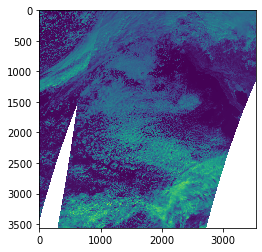

In [40]:
plt.figure()
plt.imshow(mod02_dict['2015351'][0])
plt.show()

In [45]:
a = Image.fromarray(mod02_dict['2015351'][0])
a = a.convert('RGB')

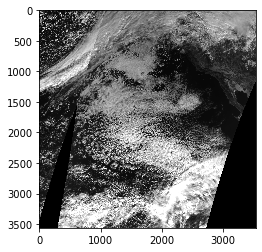

In [47]:
plt.imshow(a)

### Apply visible check

In [ ]:
"""https://rightcode.co.jp/blog/information-technology/python-artistanimation-creating-animations-multiple-diagrams
# image gif error
https://stackoverflow.com/questions/25140952/matplotlib-save-animation-in-gif-error
"""
fig = plt.figure()
#plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
ims = []
for im in mod02_dict.values():
    img =  Image.fromarray(im[0])
    img = img.convert('RGB')
    ims.append([plt.imshow(img)])
ani = animation.ArtistAnimation(fig, ims, interval=300, repeat_delay=1000)
ani.save("./MODIS-Band1-2015winter.gif", writer='imagemagick',)

### Retrieve images

2015351


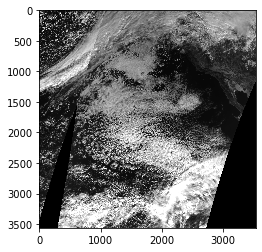

2016028


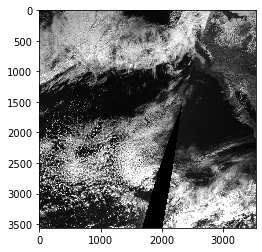

In [59]:
for idx, (key,im) in enumerate(mod02_dict.items()):
    if idx < 2:
        print(key)
        img =  Image.fromarray(im[0])
        img = img.convert('RGB')
        plt.figure()
        plt.imshow(img)
        plt.show()
        plt.close()

In [60]:
img1 = mod02_dict['2015351'][0]
img2 = mod02_dict['2016028'][0]

In [66]:
h=w=128

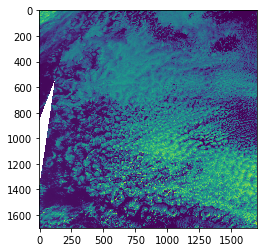

In [65]:
plt.imshow(img1[1000:2700,500:2200])

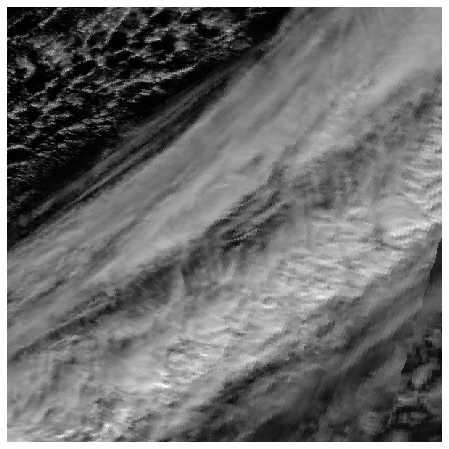

In [94]:
plt.figure(figsize=(12,8))
plt.imshow(img1[600:1200,200:800], cmap='gist_gray')
plt.axis('off')
plt.savefig('./test-image.png')
#plt.show()

In [98]:
tf.__version__

'1.14.0'

#### Rotation

In [99]:
def rotate_fn(images, angles):
    rotated_tensor_images = tf.contrib.image.transform(
        images,
        tf.contrib.image.angles_to_projective_transforms(
        angles, tf.cast(tf.shape(images)[1], tf.float32),
                tf.cast(tf.shape(images)[2], tf.float32)
            ),
        )
    return rotated_tensor_images

In [110]:
# 600:1200,200:800
tmp = np.expand_dims(img1[200:1400,0:1000],axis=-1)
img1_tf = rotate_fn(np.expand_dims(tmp,axis=0), angles=[math.pi/180*70])

In [111]:
rimg1 = tf.keras.backend.eval(img1_tf )

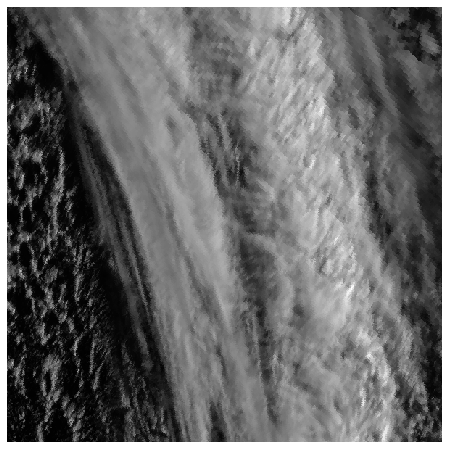

In [114]:
plt.figure(figsize=(12,8))
plt.imshow(rimg1[0,400:1000,300:900,0], cmap='gist_gray')
plt.axis('off')
#plt.show()
plt.savefig('./rot-test-image.png')

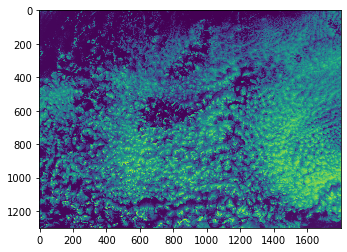

In [64]:
plt.imshow(img2[1700:3000,0:1800])